# Bridging Past and Present: Reconstructing Prince Eugene’s Library through Fuzzy String Matching

### Simon Mayer [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0009-0008-3322-5130)

Department Digital Library, Research and Data Services, Austrian National Library

### Annerose Tartler-Ostrizek [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0009-0009-4141-4270)

Department Digital Library, Research and Data Services, Austrian National Library

### Eva Mayr [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-8402-5990)

Center for Cultures and Technologies of Collecting, University for Continuing Education Krems

### Florian Windhager [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-5170-2243)

Center for Cultures and Technologies of Collecting, University for Continuing Education Krems

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/)
© 2025 Simon Mayer, Annerose Tartler-Ostrizek, Eva Mayr and Florian Windhager. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/).

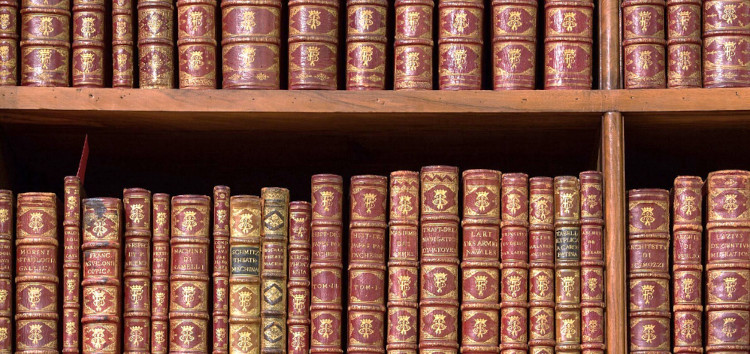

In [68]:
from IPython.display import Image, display

display(Image("./media/be_cover.jpg", width=750, height=354))

Historic Book Collection, Prince Eugene, Fuzzy String Matching, Handwritten Text Recognition, Digital Edition, Collection Visualization

The *Bibliotheca Eugeniana* (BE), the personal library of Prince Eugene of Savoy, was merged into today’s Austrian National Library after his death—without detailed documentation of the items incorporated or their subsequent dispersal within the larger holdings. As a result, the boundaries and internal structure of the historical collection became obscured over time, making it difficult to identify and study the original assembly. The project *Bibliotheca Eugeniana Digital* applied digital humanities methods to make this dispersed collection accessible in a new way. Among other approaches, we developed a string-matching algorithm to link the historical inventory of the collection with bibliographical records from the Austrian National Library's modern catalog—a process described in detail in this article. The outcomes of the project include a digital edition of the historical catalog, enriched with links to modern bibliographic data, supplementary metadata, and a visual interface enabling the exploration of the reconstructed collection.

## Introduction

Prince Eugene Francis of Savoy-Carignano (1663–1736), more commonly known as Prince Eugene, is renowned for his military victories as a field marshal of the Habsburg empire. Less widely known, however, is his role as a patron of the arts and an avid book collector. In his later years, he assembled one of the most significant Baroque book collections, the “Bibliotheca Eugeniana”. Containing more than 15,000 printed volumes, it was assessed as worth more than Prince Eugene's summer residence, the Belvedere Castle in Vienna. Following his death, the library was sold in 1738 by his sole heir, Victoria of Savoy, to the Emperor Charles VI for his newly built Imperial Court Library (“Hofbibliothek”). Today, this collection is at the core of the cathedral-like State Hall (“Prunksaal”) of the Austrian National Library (in German: Österreichische Nationalbibliothek – abbreviated as ONB in the rest of this article). In 2014, the Bibliotheca Eugeniana was recognized by UNESCO with the “Memory of Austria” distinction due to its significance as a universal library representing the state of knowledge of its time.

After its integration into the Imperial Court Library, Eugene’s books were largely placed in shelves of the “central oval” of the State Hall and assigned call numbers beginning with “BE” (for Bibliotheca Eugeniana). Over time, some of these books were moved to other collections or archives, while books from different origins were added to fill up the shelves of the central oval, also receiving the “BE” shelf mark. As a result, nearly 300 years later, the “BE” shelf mark was no longer indicative of historical provenance from Eugene's private library, but rather of its physical location within the ONB, and the collection became difficult to reconstruct and access for users.

Accordingly, research on the Bibliotheca Eugeniana (see, for example, <cite id="9c4hs"><a href="#zotero%7C9147593%2F4C9EJRV8">(Mazal 1986)</a></cite>, <cite id="jmluc"><a href="#zotero%7C9147593%2FET775AVA">(Mauthe 2010)</a></cite>) has mostly focused on single items of high interest, such as the famous map by Konrad Peutinger, the *Tabula Peutingeriana* (see [onb.digital/result/10002029](https://onb.digital/result/10002029) for the digitized map). Despite the historical significance of the entire collection, little research has been undertaken at the corpus level, as the sheer number of volumes and access issues have hindered such endeavors.

To address this gap, the project *Bibliotheca Eugeniana Digital* (BED, see [labs.onb.ac.at/bed/en/](https://labs.onb.ac.at/bed/en/) for the project's website) was initiated. The two-year collaboration between the University for Continuing Education Krems and the ONB sought to answer the following key questions about the Bibliotheca Eugeniana:

- What is the exact composition of Bibliotheca Eugeniana?
- How many books were originally part of Bibliotheca Eugeniana?
- Where are the books located in the ONB today?
- How can this collection be visualized and made accessible online?

The goal was to accomplish a systematic digital reconstruction and visual representation of Prince Eugene's library, using digitized sources and new digital humanities methods. The project drew on several data sources: (1) the historical handwritten catalog of the collection, which was digitized at the ONB during the project, (2) the historical book holdings of the ONB, digitized in collaboration with Google as part of the “Austrian Books Online” (ABO) project <cite id="rm6bp"><a href="#zotero%7C9147593%2FI68DLFJR">(Kaiser and Majewski 2013)</a></cite>, and (3) the modern library catalog system (Alma), which provides metadata for nearly all books currently held by the ONB.

The digitization of these sources enabled the use of novel methods: machine learning and computer vision were employed to detect Prince Eugene's coat of arms on the “supralibros” bindings of BE book covers (based on previous work from <cite id="nuakq"><a href="#zotero%7C9147593%2FPRNUCNC7">(Krickl, Mayer, and Zangger 2022)</a></cite>), while handwritten text recognition (HTR) models transcribed the historical catalog of the collection and thus obtained its content in digital form <cite id="2gm2e"><a href="#zotero%7C9147593%2F4ZES77T2">(Tartler et al. 2025)</a></cite>. Finally, this data was linked to the modern catalog using a *fuzzy string matching algorithm*, which is at the center of this article.

Results of the project include a digital edition of the first three thematic volumes of the handwritten catalog (see <cite id="duwmm"><a href="#zotero%7C9147593%2F3DBBCG32">(Mayer, Steindl, and Tartler 2024)</a></cite>), a prototype visualization web application (see [labs.onb.ac.at/bed/eugeniana/](https://labs.onb.ac.at/bed/eugeniana/)) developed in collaboration with [mindfactor IT solutions eU](https://mindfactor.at/), and the integration of data into the ONB's catalog system. Further information is available in the following publications: <cite id="myjoq"><a href="#zotero%7C9147593%2FWKYGA6BX">(Windhager et al. 2024)</a></cite>, <cite id="wiyrm"><a href="#zotero%7C9147593%2F64FPJ5RP">(Mayr et al. 2024)</a></cite>, <cite id="z7exl"><a href="#zotero%7C9147593%2FS36QXTYL">(Mayr et al. 2025)</a></cite>, <cite id="sizba"><a href="#zotero%7C9147593%2FDAWNW8FU">(Mayr, Windhager, et al. 2025)</a></cite>.

In this article, we detail the string matching task and the developed algorithm. [Section String matching task](#anchor-string-matching) motivates the current need for string matching in the context of digital humanities. It presents concrete examples and provides an overview of the data, followed by a step-by-step explanation of the string matching process and its application to the whole dataset. [Section Integration of the results](#anchor-integration) outlines the integration of the results into other project components. Finally, we discuss advantages and drawbacks of the chosen approach in [Discussion](#anchor-discussion).

## String matching task

String matching is a well-established field of practice with a vast body of literature, particularly in computer science and information retrieval (see, for example, <cite id="tl1ta"><a href="#zotero%7C9147593%2FIMN72Z3I">(Almazroi et al. 2022)</a></cite>, <cite id="btutu"><a href="#zotero%7C9147593%2FQIWZ2NJP">(Faro and Lecroq 2010)</a></cite>, <cite id="xs2c8"><a href="#zotero%7C9147593%2FIH2G8DF3">(Hakak et al. 2019)</a></cite>, <cite id="ojvnc"><a href="#zotero%7C9147593%2F5M2UXISP">(Michailidis and Margaritis 2001)</a></cite>). Within the digital humanities (DH), however, the topic has received comparatively little systematic attention. While many DH projects rely on some form of string matching for record linkage, historical text processing, or authority file reconciliation, methodological details are rarely foregrounded. Instead, the matching process often remains a “black box,” with publications emphasizing broader infrastructures, theoretical frameworks, or final outcomes.

A few notable exceptions show the potential of string matching within DH and library science. For instance, the *Emblematica Online* project describes how legacy catalog data were reconciled with authority files such as VIAF and the Library of Congress Linked Data Service <cite id="d3s9k"><a href="#zotero%7C9147593%2F96VEMC3J">(Tian, Cole, and Yu 2021)</a></cite>. Other studies examine authority control and reconciliation more broadly, such as the discussion of VIAF and Wikidata as complementary tools for libraries by Bianchini and colleagues <cite id="ebmy3"><a href="#zotero%7C9147593%2FFMU6PNUT">(Bianchini, Bargioni, and Pellizzari di San Girolamo 2021)</a></cite>, or recent work on aligning Italian SBN authority records with Wikidata <cite id="k0xg5"><a href="#zotero%7C9147593%2FWV23ARKU">(Pellizzari di San Girolamo 2024)</a></cite>. In the DH domain, annotation tools such as Recogito 2 <cite id="8pyef"><a href="#zotero%7C9147593%2FMZEUDPXI">(Simon et al. 2017)</a></cite> and subsequent studies of its use <cite id="e9a2g"><a href="#zotero%7C9147593%2FSMZGI8ZU">(Barker et al. 2019)</a></cite> demonstrate how geospatial and textual annotation necessarily involve string-based entity recognition and reconciliation against gazetteers and authority files. Similarly, projects in the museum and cultural heritage sector—such as work from Middle and colleagues <cite id="z2ywd"><a href="#zotero%7C9147593%2FHPJW9IAF">(Middle et al. 2025)</a></cite> on linking unstructured museum data—illustrate how metadata enrichment depends on resolving string-level variation in names, places, and object descriptions.

Yet despite these important contributions, two limitations remain. First, the majority of existing work concentrates on authority control (persons, places, subjects) rather than on item-level bibliographic records. Second, almost all documented case studies deal with digital or semi-structured legacy data, not with pre-modern handwritten catalogs or inventories. As a result, the specific methodological challenges of matching centuries-old catalog entries—featuring historical orthography, inflections, abbreviations, and inconsistent descriptions—to modern bibliographic systems are largely absent from the literature.

This gap is particularly evident at the intersection of historical research and library science. The procedures and heuristics  on which the reconstruction of dispersed collections or the alignment of early catalogs with present-day library metadata crucially depend are rarely made explicit in scholarly publications. A survey of academic databases confirms this imbalance: thousands of articles discuss string matching techniques in general, yet only a handful intersect explicitly with DH and library contexts.

By focusing on the specific case of the *Bibliotheca Eugeniana*—and the matching of its 18th-century handwritten catalog to the Austrian National Library’s modern system—this article contributes to filling that methodological gap. It demonstrates how established string matching techniques can be effectively applied to the challenges of historical bibliographic data and cultural heritage research. More broadly, it argues that string matching should not remain an invisible technical step but be recognized as a central scholarly practice within digital humanities and library science, since it both underpins the reconstruction and analysis of cultural heritage collections and relies on informed responses to complex methodological questions.

### Description of the task and a concrete example

The main source for reconstructing Prince Eugene's collection was the historical handwritten catalog that was acquired along with the library in 1738. It was probably written by Étienne Boyet, the Prince's librarian from 1712 until Eugene's death in 1736. However, additions and annotations by other scribal hands can be found as well, hinting at a continued use of the catalog during the later part of the 18th century, when the collection was transferred to the Imperial Court Library. Presumably, the catalog in its original scribal hand contains every work of the Bibliotheca Eugeniana, reflecting the state of the collection as of 1736. More details about these additions and annotations (based on X-ray fluorescence analysis) can be found in the recent publication <cite id="sbftk"><a href="#zotero%7C9147593%2FS36QXTYL">(Mayr, Windhager, et al. 2025)</a></cite>.

Today, two manuscript copies of this catalog—each comprising five volumes—are held at the ONB, under the call numbers Cod. 14376–14380 and Cod. 13963–13966*. Since the first mentioned catalog (with call numbers starting with “143”) contains the prior mentioned annotations and additions, it was deemed more relevant for reconstructing the collection, and was selected for further analysis. Nevertheless, both copies were fully digitized during the project and are now openly accessible via the ONB's online catalog (by using the call number, for example, searching the term “Cod. 14376” via the URL  [search.onb.ac.at/primo-explore/search?query=any,contains,Cod.%2014376&tab=default_tab&search_scope=ONB_gesamtbestand&vid=ONB&lang=en_US&offset=0](https://search.onb.ac.at/primo-explore/search?query=any,contains,Cod.%2014376&tab=default_tab&search_scope=ONB_gesamtbestand&vid=ONB&lang=en_US&offset=0)) gives the first volume of the handwritten catalog as the first result).

The first three volumes (with call numbers Cod. 14376–14378) constitute a thematic catalog, while volumes 4 and 5 are indices of the same books, ordered by author name and book titles, respectively. Volumes 1, 2 and 3 contain all works, and we applied an HTR model (on a row basis) using the HTR platform Transkribus (see [transkribus.org](https://transkribus.org/)) to obtain the full text from the scanned images. See <cite id="5i4ej"><a href="#zotero%7C9147593%2F4ZES77T2">(Tartler et al. 2025)</a></cite> for more details about this process. Afterwards, a custom layout analysis was performed (using Python scripts) in order to obtain paragraph grouping, which aimed to establish a correspondence to bibliographic units, i.e., the works of the collection. [Figure 1](#figure-matching-example-*) shows a typical page from the handwritten catalog, describing three works on natural history.

The matching task aimed to connect these bibliographic units to entries in ONB's modern library catalog, thereby linking the books to their present shelf locations and re-establishing access to the collection for further research. The general matching strategy was as follows: (1) Combine the metadata from the modern catalog in the same order in which they appear in entries of the historical handwritten catalog, namely *author* and/or *editor*, *title*, *place of publication*, and *year of publication* into a single string. (2) On this basis, perform fuzzy string matching against all entries of the handwritten catalog. This would result in five approximate matches, from which a user had to manually select the correct one (if possible). Our approach can therefore be considered semi-automatic. To improve accuracy, we initially planned to also attempt matching in the reverse direction, that is, starting from the handwritten descriptions, we would need to gain a semantic understanding of the paragraph, extract the metadata, and then search for this information in ONB's online catalog. However, due to time constraints within the project, only the first matching direction could be carried out. For further discussion on possible developments in this direction, see below.

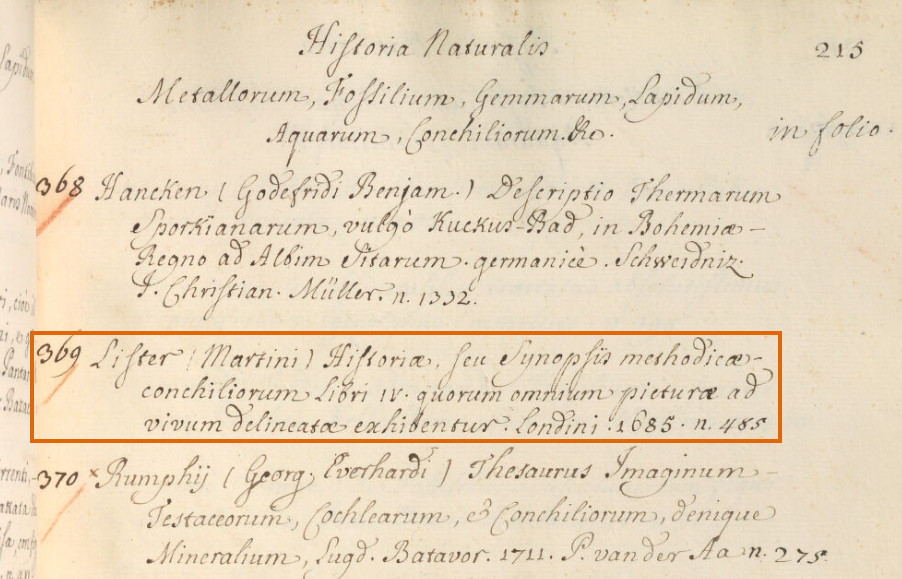

In [69]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "Detail from page 215 of the first volume of the handwritten catalog (Cod. 14376). The knowledge class (‘Historia Naturalis’ – Natural History) appears at the top of the page, followed by a more specific subclass (‘Metallorum, ...’ – Metals etc.). The page number and format specification are noted in the top right corner (or top left on verso pages). Below this taxonomic heading, the bibliographic entries for works of Bibliotheca Eugeniana begin. The entry marked with an orange rectangle corresponds to the books with call numbers BE.4.J.10.(Vol.1–4), identified through the string matching process described in the main text."
            ]
        }
    }
}
display(Image('./media/lister_historiae.jpg', width=902, height=579), metadata=metadata)

As a concrete **example**, consider the work *“Historia sive Synopsis Methodica Conchyliorum”* by Martin Lister (see the orange rectangle in [Figure 1](#image-matching-example-*) for the entry in the handwritten catalog) about natural history of shellfish with call number “BE.4.J.10.(Vol.1)” from the middle oval in the State Hall (vol. 2–4 are also in the catalog with a later publication date, which creates additional difficulty for matching these volumes with the handwritten catalog, see [data.onb.ac.at/rec/AC11857047](https://data.onb.ac.at/rec/AC11857047) for the entry in the library catalog). The correct metadata for vol. 1 from the modern library catalog is given in [Table 1](#table-example-modern-catalog-*), while the generated matches on the basis of all entries from the handwritten catalog (see below for a detailed explanation) are given in [Table 2](#table-example-matches-*).

author|title|place|year
---|---|---|---
Lister|Historia sive Synopsis Methodica Conchylio-<br>rum, quorum Omnium Pictura, ad vivum de-<br>lineata, exhibetur|Londini|1685

match 1|match 2|match 3|match 4|match 5
---|---|---|---|---
Lister Mar-<br>tini Historiae seu<br>Synopsis method-<br>icae conchiliorum<br>Libri IV quorum<br>omnium picturae<br>ad vivum delin-<br>eatae exhibentur<br>Londini 1685 n<br>485|Eadem Historia<br>Londini 1646 n<br>1911|Le Grand Anton<br>Historia Naturae<br>variis experimen-<br>tis elucidata cum<br>fig Londini 1680 I<br>Martin n 333|Plinĳ Secundi<br>Historia Naturalis<br>a I Harduino cum<br>ad vsum Delphini<br>edita 5 Vol Paris<br>1685 Muguet n<br>1835|Raĳ Ioan Me-<br>thodica Synopsis<br>Avium & Piscium<br>8° Lond 1713 W<br>Iunys n 861

### Description of the dataset and data cleaning/preparation

As described above, our objective was to match entries from ONB's modern catalog with entries in the handwritten historical catalog. Since the modern catalog is quite extensive (containing contemporary works as well as historical ones), we narrowed it down to  a subset of entries. This subset contained all “BE”-type call numbers (i.e., call numbers starting with BE from the shelves of the central oval in the State Hall) and other volumes of the State Hall with Prince Eugene's coat of arms on the cover (which have been identified using image classification algorithms), totalling around 23,000 bibliographic units. On the other hand, the dataset created through layout analysis and HTR of the handwritten historical catalog consisted of about 10,000 entries (originating from the 1,500 pages of the first three volumes of the handwritten catalog). Both datasets are provided in the repository of this article (see the directory `script`) as `.csv` files already enriched with the results of the matching process for the reader's convenience. In the following, we describe both datasets in more detail.

The **modern catalog data** (see `BE_final.csv`) was extracted from the modern library catalog with the help of systems librarians at the ONB. The table spans the following columns:

- *Call number*: shelf mark (i.e., location) of the books to be matched, mostly from the State Hall (central oval and adjoining shelves or chambers) and a few from other relevant archives
- *Title*: book title as given in the modern library catalog. For older books, this has been transcribed from the old card catalog
- *Author*: mostly given as “surname, given name”, but name components can be given in varying orders
- *Contributor* such as editor, printer, etc.
- *Begin publication date*: in case of a date range we considered just the first year
- *Publication place*: as given in the library catalog (and not necessarily normalized)
- *IIIF manifest*: URL of the digital resource, if the work has been digitized (either through Google in the ABO project, or through the digitization on demand workflow at ONB)
- *Hw. catalog*: Boolean indicator (0/1) to show an established connection to the handwritten catalog (added after having completed the matching process)
- *Hw. catalog entry ID*: identifies the match with one or more places in the handwritten catalog
- *AC number*: catalog number in ONB's modern library catalog, identifying the bibliographic entry

For this article, we have omitted a number of columns (containing further bibliographical metadata and machine learning specific results) in the table `BE_final.csv` to save some space, the full table can be obtained from the project's Gitlab repository served at the ONB Labs' Gitlab instance: [labs.onb.ac.at/gitlab/bed/bed-general](https://labs.onb.ac.at/gitlab/bed/bed-general/).

In [70]:
import pandas as pd
import re
import numpy as np
from thefuzz import fuzz, process
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import requests
import json
pd.set_option("max_colwidth", None)

BE_df = pd.read_csv('script/BE_final.csv', index_col=0)
BE_df

,call number,title,author,contributor,begin publication date,publication place,IIIF manifest,hw. catalog,hw. catalog entry ID,AC number
0,*28.A.79.(Vol.1),Histoire des ouvrages des scavans,"Basnage de Beauval, Henri",NaN,1687.0,Rotterdam,https://iiif.onb.ac.at/presentation/ABO/Z222907107/manifest,1,14.378_443_03,AC09684749
1,*28.A.79.(Vol.10),Histoire des ouvrages des scavans,"Basnage de Beauval, Henri",NaN,1687.0,Rotterdam,https://iiif.onb.ac.at/presentation/ABO/Z222908100/manifest,1,14.378_443_03,AC09684749
2,*28.A.79.(Vol.12),Histoire des ouvrages des scavans,"Basnage de Beauval, Henri",NaN,1687.0,Rotterdam,https://iiif.onb.ac.at/presentation/ABO/Z222908306/manifest,1,14.378_443_03,AC09684749
3,*28.A.79.(Vol.13),Histoire des ouvrages des scavans,"Basnage de Beauval, Henri",NaN,1687.0,Rotterdam,https://iiif.onb.ac.at/presentation/ABO/Z222908409/manifest,1,14.378_443_03,AC09684749
4,*28.A.79.(Vol.14),Histoire des ouvrages des scavans,"Basnage de Beauval, Henri",NaN,1687.0,Rotterdam,https://iiif.onb.ac.at/presentation/ABO/Z222908501/manifest,1,14.378_443_03,AC09684749
...,...,...,...,...,...,...,...,...,...,...
22863,Ink 9.F.4,Opera,"Sallustius Crispus, Gaius",NaN,1481.0,Venice,NaN,1,14.377_437_08,AC10850933
22864,Ink 9.F.5,Biblia ; Interpretationes Hebraicorum nominum,NaN,"Wild, Leonhard",1481.0,Venedig,NaN,1,14.376_026_00,AC06748798
22865,SA.71.E.58,Dialogue sur la musique des anciens,"Chateauneuf, Francois abbe de",NaN,1725.0,Paris,https://iiif.onb.ac.at/presentation/ABO/Z252861302/manifest,1,14.376_341_05,AC09771765
22866,SA.71.F.74,Friderici Adolfi Lampe De Cymbalis Veterum Libri Tres,"Ember, Paul","Hase, Cornelius <<von>>; Röell, Herman Alexander",1703.0,Trajecti Ad Rhenum,https://iiif.onb.ac.at/presentation/ABO/Z252867808/manifest,1,14.378_367_03,AC09836828


The first three volumes of the **handwritten catalog** were automatically transcribed using Transkribus, and subsequently corrected by the project team. Through statistical means based on the indentation and spacing of the entries, we obtained a partition into paragraphs corresponding to bibliographic units. The resulting table consists of the following columns:

- *Volume*: call number of the three volumes that were analyzed for this task, one of Cod. 14376, 14377 or 14378
- *Page number*: page number of the digitized object, which is required to navigate to the page in a digital viewer
- *Category*: knowledge class given at the top of the page on a regular page with bibliographic entries
- *Subcategory*: knowledge subclass (more detailed than the general knowledge class) given below the knowledge class
- *Format*: format specification, one of “Folio”, “Quarto”, “Octavo & min. forma”, corresponding to the size of the books
- *Handwritten* page number: the page number written on the page by hand, which was added for easier reference
- *Entry_ID*: ID given by us to identify the bibliographic unit on the page, based on layout analysis
- *Entry*: transcribed and corrected text for one bibliographic unit, still contains special characters, umlauts, etc.
- *AC numbers*: connection to the modern catalog, together with quality measure of the match (added after completion of the string matching process)

In [71]:
entry_df = pd.read_csv('script/hw_entries_final.csv', index_col=0)
entry_df

,volume,page number,category,subcategory,format,handwritten page number,entry_ID,entry,AC numbers
0,14.376,25,Theologia,Textus & Versiones Sacræ Scripturæ,Folio,1,14.376_025_00,"1 Biblia Sacra Polyglotta curis Cardinalis Ximenij¬ edita, cum Vocabulario Hebraïco & Chaldaïco veteris Testamenti. 56 Vol. Compluti. 1515. & annis Seqq. Guill. de Brocario. n. 84. Integra biblia sunt V. volumini= bus comprehensa. deest Vocabularium, quod pro sexto numeratur.",NaN
1,14.376,25,Theologia,Textus & Versiones Sacræ Scripturæ,Folio,1,14.376_025_01,"2 Biblia Sacra Polyglotta Philippi II. Regis Cathol. pietate, ac # Studio ad Sacro- Sanctæ Ecclesiæ usum edita, cum Apparatu & Lexico. 8 Vol. Antuerp. 1572. Plantin. n. 9.",NaN
2,14.376,25,Theologia,Textus & Versiones Sacræ Scripturæ,Folio,1,14.376_025_02,3 Biblia Sacra Polyglotta Studio & curâ Briani Waltoni edita. 6 Vol. chartâ Magnâ. Londini. 1637. Roycroft. accedit n. 36. Lexicon Heptaglotton ad eadem Biblia Polyglotta autore Edmundo Castello. 2 Vol. chartâ M. Londini. 1669. Roycroft. N. 36.,"[('AC09762517', 'sicher')]"
3,14.376,25,Theologia,Textus & Versiones Sacræ Scripturæ,Folio,1,14.376_025_03,"4 Biblia Sacra Latina Moguntina dicta, prima omnium editio in Membranis. 2 Vol. Moguntiæ. 1462.¬ Ioan. Fust, & Petr. Schoiffer de Gerneshem. n. 2088. II.O.5.",NaN
4,14.376,25,Theologia,Textus & Versiones Sacræ Scripturæ,Folio,1,14.376_025_04,"5 Biblia Sacra Latina Moguntina, editio altera 2 Vol. chartâ Magnâ. Moguntiæ. 1472. Petr. Schoiffer. II.O.7. de Gerneshem. n. 2089.","[('AC07081950', 'sicher')]"
...,...,...,...,...,...,...,...,...,...
9398,14.378,582,Imaginum Delineatarum Collectio,NaN,NaN,1402,14.378_582_00,CCCXXXI Vn Portefeüilles contenant des Desseins de plusieurs Villes d'Espagne par Ant. Van-den-Wingarde. dont il n'y a pas de Catalogue. n. 990.,NaN
9399,14.378,582,Imaginum Delineatarum Collectio,NaN,NaN,1402,14.378_582_01,CCCXXXII Vn Recueil des Portraits peints en miniature sur velain au nombre de 34. dont le Premier est celuy de Philippe le Hardy. n. CCIV.,NaN
9400,14.378,582,Imaginum Delineatarum Collectio,NaN,NaN,1402,14.378_582_02,CCCXXXIII Dix Vol. de Plantes peintes en miniature par Nicol. Robert. vide. Hist. Plantarum,NaN
9401,14.378,582,Imaginum Delineatarum Collectio,NaN,NaN,1402,14.378_582_03,CCCXXXIV Cinq Vol. d'Oiseaux peints en Miniature par Nic. Robert. vide. Histor. Animalium.,NaN


Before attempting to match the two tables, we performed some data cleaning and preparation. In particular, we removed punctuation and initial numbers (Arabic and Roman), converted the entries to lower case and removed accents and special symbols. From the modern catalog data, we excluded all works that were published after 1736 (which is the year of Prince Eugene's death). Then we dropped duplicate titles for multi-volume works in order to reduce the manual effort of evaluating the resulting matches.

In [72]:
def prepare_string(string):
    new = re.sub(r'[.,:;()¬]|^[CLXVI]+? |^\d+? |^\d+?\.+? |^\.+ ?|= |# ', '', string)
    new = new.lower()
    new = re.sub(r'[àáâãå]', 'a', new)
    new = re.sub(r'[èéêë]', 'e', new)
    new = re.sub(r'[ìíîï]', 'i', new)
    new = re.sub(r'[òóôõ]', 'o', new)
    new = re.sub(r'[ùúû]', 'u', new)
    new = re.sub(r'æ', 'ae', new)
    return new

entry_df['cleaned entry'] = entry_df['entry'].apply(lambda x: prepare_string(x))
BE_early = BE_df[BE_df['begin publication date'] < 1736]
BE_no_year = BE_df[BE_df['begin publication date'].isna()]
BE_manual = BE_df.loc[BE_early.index.union(BE_no_year.index)].drop_duplicates('title')

### Description of algorithm and evaluation for choice of scorer

We used the Python library *thefuzz* (see [pypi.org/project/thefuzz/](https://pypi.org/project/thefuzz/)) to efficiently compare strings, drawing on benchmarks such as <cite id="sm57b"><a href="#zotero%7C9147593%2FX9AZHEBX">(Elmobark 2025)</a></cite> which show that *RapidFuzz*—the C++-based engine underlying thefuzz—outperforms other major libraries in speed and memory efficiency while delivering comparable accuracy. One example used for two very similar strings would give the following result:

```python
>>> fuzz.ratio("this is a test", "this is a test!")
97
```

The function `generate_matches` (see below) first combines the metadata from an entry of the modern catalog (author, contributor, title, publication place and begin publication date if given) in this order and then extracts the five most similar entries from the handwritten catalog using the `process.extract` function, which given a reference string extracts the most similar result(s) from a list of given strings. See below for an example use of `process.extract`:
```python
>>> choices = ["Atlanta Falcons", "New York Jets", "New York Giants", "Dallas Cowboys"]
>>> process.extract("new york jets", choices, limit=2)
```

Which generates the output:
```python
[('New York Jets', 100), ('New York Giants', 78)]
```

Finally, it returns the combined string, together with five matches (corresponding to setting `limit=5`) consisting of matched text, a similarity score, and an ID of the entry.

In [73]:
# Helper method to flatten lists of lists
def flatten(xss):
    return [x for xs in xss for x in xs]

# Generate 5 matches based on a combination of metadata from the modern catalog
def generate_matches(row, hw_entries, scorer):
    keys = ['author', 'contributor', 'title', 'publication place', 'begin publication date']
    comb_string = ''
    for key in keys:
        val = row[key]
        if not pd.isna(val):
            if key == 'author' or key == 'contributor':
                if ',' in val:  # if [surname], [given name]
                    val = val.split(',')[0]
                val = val.split(' ')[0]
            elif key == 'title':
                val = prepare_string(val)
            elif key == 'begin publication date':
                val = str(int(val))
            else: # key == 'publication place'
                pass
            comb_string += val + ' '
    comb_string = comb_string.lower()
    
    # Perform fuzzy matching here
    matches_lis = flatten(process.extract(comb_string, hw_entries, scorer=scorer, limit=5))
    
    return [comb_string] + matches_lis

The `process.extract` function allows to choose from five different scoring methods (*ratio*, *partial ratio*, *token sort ratio*, *token set ratio*, *partial token sort ratio*) for comparing similarity of strings. We wanted to evaluate their performance on our dataset and selected the first 20 entries for a comparison. For simplicity, we only compared the performance on the first match with the highest similarity score:

In [ ]:
scorers = [fuzz.ratio, fuzz.partial_ratio, fuzz.token_sort_ratio, fuzz.token_set_ratio, fuzz.partial_token_sort_ratio]
scorer_names = ['ratio', 'partial ratio', 'token sort ratio', 'token set ratio', 'partial token sort ratio']
scoring_df = pd.DataFrame(columns=['scorer', 'input'])

for scorer, name in tqdm(zip(scorers, scorer_names), total=5):
    sample_matches = []
    for index, row in BE_manual[:20].iterrows():
        matches = generate_matches(row, entry_df['cleaned entry'], scorer)
        # drop scores and ids, only keep input and first match
        filtered_matches = [matches[0], matches[1]]
        sample_matches.append(filtered_matches)
    sample_df = pd.DataFrame(sample_matches, columns=['input', 'match_1'])
    sample_df.insert(0, 'scorer', name)
    scoring_df = pd.concat([scoring_df, sample_df], ignore_index=True)

  0%|          | 0/5 [00:00<?, ?it/s]

After manually evaluating the matches for different scorers (given in the list `true_match`), we could plot the performance for each scorer. The best one turned out to be the token set ratio by a small margin.

In [ ]:
true_match = [
    [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
]

fig, ax = plt.subplots()
ax.bar(scorer_names, np.sum(true_match, axis=1), width=0.7, color='#ffb66d')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, rotation_mode='anchor', ha='right', va='center_baseline', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('# of correct matches (out of 20)')
ax.set_title('Evaluation of different scoring methods for fuzzy string matching')
plt.savefig('media/scorers_compared.jpg', bbox_inches='tight', dpi=300)
plt.close()

In [ ]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "Performance evaluation of different scoring methods for fuzzy string matching on the first 20 entries in the table `BE_manual`. For simplicity, here we compared only the correctness of the first suggested match (with the highest similarity score). The full algorithm applied to the whole dataset (described below) would produce five potential matches, ordered by similarity score."
            ]
        }
    }
}
display(Image('./media/scorers_compared.jpg', width=500, height=430), metadata=metadata)

### Applying the algorithm to the dataset

We used the **token set ratio** as scorer for matching on the whole set since it performed slightly better than the other scorers. The following code performs the matching as described above (first combining the metadata from the modern catalog and then searching for five matches in the handwritten catalog entries) on the complete dataset. The similarity score given by the `process.extract` function was dropped as it was not deemed useful as a quality measure: The score can be high for wrong matches and low for correct matches without an obvious way of distinguishing the two cases. Finally, all generated matches were written into the table `matches_df.csv` for manual inspection of the matches.

In [ ]:
# Since executing this cell takes about 20 minutes, we load the resulting table from a file instead. This can be changed by commenting out the next line.
matches_df = pd.read_csv('./script/matches_df.csv', index_col=0)

if 'matches_df' not in vars():
    matches = []
    scorer = fuzz.token_set_ratio
    for index, row in tqdm(BE_manual.iterrows(), total=len(BE_manual)):
        matches.append(generate_matches(row, entry_df['cleaned entry'], scorer))
    matches_df = pd.DataFrame(matches, columns=['input', 'match_1', 'score_1', 'id_1', 'match_2', 'score_2', 'id_2', 'match_3', 'score_3', 'id_3', 'match_4', 'score_4', 'id_4', 'match_5', 'score_5', 'id_5'])
    matches_df['control'] = ''
    matches_df = matches_df.drop(['score_1', 'score_2', 'score_3', 'score_4', 'score_5'], axis=1)
    matches_df.insert(1, 'input_id', BE_manual.index)
    matches_df.to_csv('script/matches_df.csv')

matches_df

Having automatically generated the suggested matches, we manually evaluated the quality of these suggestions, together with several interns from the ONB, as there appeared to be no clear automatic way on how to evaluate them. By going through the `matches_df.csv table`, we compared the first column with the five suggestions in the following columns and assigned for one or more potential matches the certainty of the match: We marked cases where the congruency between the two strings was convincing enough as certain, uncertain for cases where the year or place of publication did not match exactly (hinting at another edition/reprint of the same work) and left the field blank for evidently incorrect suggestions.

Often, the first match is the correct one, but for recurring cases the matching method failed to represent the correct match in the first position—or shortlist it at all. For example, if the librarian chose to omit a repetition of an author's name and replaced it with “Eiusdem” (Latin for “of the same”), another work of this author could achieve higher similarity than the one originally sought for. Another advantage of giving multiple matches is the possibility of finding reference entries (that is, shortened entries with a reference to the location of the full entry) that appear in multiple thematic sections in order to help librarians find certain books.

As noted above, we did not find a clear automatic criterion for evaluating the scores produced by the string comparison algorithm. Setting a global quality score threshold—below which a match would be discarded—would eliminate too many correct matches while preserving false ones at the same time. On the other hand, choosing a dynamic evaluation per match (based on relative differences of scores) was also not viable, since we encountered numerous cases where correct and incorrect matches scored similarly, without being reordered appropriately. Given these limitations and the finite project time frame, we considered the semi-automatic method to be most prolific: generating potential matches first, to evaluate and verify them manually.

In order to evaluate the matching method, we visualize the matching statistics of the thematic catalog by plotting for each thematic section (i.e., knowledge class) the number of entries that are written in the catalog, and if they were matched or not.

In [ ]:
cats = entry_df['category'].value_counts()
entry_df['hasMatch'] = entry_df['AC numbers'].notna()
matched_cats = entry_df[['category', 'hasMatch']].value_counts()
matched_cats_dict = {
    'matched': matched_cats.loc[:, True].reindex(cats.index, fill_value=0).values,
    'unmatched': matched_cats.loc[:, False].reindex(cats.index, fill_value=0).values
}
m_color = {
    'matched': '#cc4638',
    'unmatched': '#ffb66d'
}

fig, ax = plt.subplots(figsize=(9,5))
bottom = np.zeros(len(cats.index))
width = 0.7
for is_matched, match_count in matched_cats_dict.items():
    bar = ax.bar(cats.index, match_count, width, label=is_matched, bottom=bottom, color=m_color[is_matched])
    bottom += match_count
ax.bar_label(bar, labels=cats.values, rotation=90, padding=5, fontsize=10)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='center_baseline', fontsize=10)
ax.set_ylim(top=1700)
plt.margins(x=0.02, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Number of entries in the handwritten catalog per category')
ax.legend(loc='upper right')
plt.savefig('media/knowledge_classes.jpg', bbox_inches='tight', dpi=300)
plt.close()

In [ ]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "Overview of the number of entries corresponding to bibliographic units in the handwritten catalog of Bibliotheca Eugeniana per Latin knowledge class. The knowledge classes were assigned using results of the layout analysis."
            ]
        }
    }
}
display(Image('./media/knowledge_classes.jpg', width=1100, height=828), metadata=metadata)

### Evaluating the matching process

Using the overview of matches per knowledge class in [Figure 3](#image-categories-overview-*), we could evaluate the effectiveness of this matching method. There was a high matching rate for the catalog classes of mathematics, natural history and philosophy (more than 70%), while the matching rate for manuscripts, etchings, and paintings dropped considerably (less than 8%). Overall, almost two thirds (ca. 63%) of all entries in the handwritten historical catalog have been matched successfully to an entry in the ONB's modern catalog.

Difficulties emerged first of all from the prevalence of differing languages between the two catalog systems. Titles in the historical handwritten catalog were often translated and/or transcribed into French (presumably the principal language of Prince Eugene’s librarian), while titles in the modern catalog system Alma are mostly faithful to the original title printed in the beginning of the book. On the other hand, author names in the modern catalog system were often Germanized (in the case of prominent figures) to improve recognizability, while the handwritten catalog used contemporary Latin or French variants of the names. Another difficulty was due to ellipses and/or abbreviations in the handwritten catalog. Given multiple works by the same author, his/her name would be noted only once and then omitted for further consecutive entries as mentioned earlier. Additionally, place names and first names would often be abbreviated, which lead to ambiguities in some cases. This was particularly relevant for the aforementioned reference entries which are by design less verbose than the original entry they reference. Cases of failed layout analysis presented another difficulty, as multiple works could erroneously be concatenated into a single string and then matched with only one of the works described within.

Finally, some ambiguities occurred for different editions of the same work that were printed in different years. The low matching rate for manuscripts, etchings and paintings are unsurprising, as these items have been transferred to other departments within the ONB—such as the Department of Manuscripts, the Picture Archives and Graphics Department, and the Collection Albertina. These departments were not included in the initial dataset of “BE”-type call numbers used for the first matching direction. The high matching rate for mathematics, natural history and philosophy, in contrast, could stem from the typically elaborate and precise titles of works in these sections, facilitating a more reliable matching procedure.

In summary, the matching statistics fall short of 100% for several reasons. First, some books have been moved to other departments or shelves, which may only become apparent when the matching is carried out starting from the handwritten catalog entries. Second, some books may have been sold or exchanged during the aforementioned inventory revision of the State Hall in the second half of the 19th century. Finally, some books may not have been matched due to language issues: while entries in the handwritten catalog are primarily written in French or Latin, the modern catalog often documents titles in the original language of the work, which introduces diverging strings for the matching.

## Integration of the results

The results from the string matching process were integrated into the following project outcomes:

- A digital edition of the handwritten catalog
- A prototype web application to visualize the library
- The ONB’s modern library cataloging system (Alma)

In the following sections, we describe each of these outcomes in detail, highlighting how and where the string matching data was integrated.

### Digital edition of the handwritten catalog

By combining the full text of the handwritten catalog with the matching data, we were able to publish a digital edition of the first three volumes (Cod. 14376–14378) of the catalog <cite id="q9cgr"><a href="#zotero%7C9147593%2F3DBBCG32">(Mayer, Steindl, and Tartler 2024)</a></cite>. This edition builds on the ONB’s sustainable infrastructure for digital editions (see [edition.onb.ac.at](https://edition.onb.ac.at/)) and on a transformation of the relevant information using the TEI-XML standard. In addition to the full text, each page included markup for the following features:

- Knowledge class in the first line at the top of the page
- Knowledge subclass in the second (and third) line at the top of the page
- Page number in the top page corners
- Format specification below the page number
- List of entries corresponding to bibliographic units
- Wherever possible, each entry includes a link to ONB’s modern catalog, incorporating results obtained during the string matching process

The following functions and editorial texts were included in the first release (in November 2024) of the digital edition (see [Figure 4](#image-digital-edition-example-*) for a screenshot of the synoptic view):

- An overview page with choice of catalog volume, together with links to the digitized objects for the remaining volumes that are not yet part of the edition. After choosing a volume, the user can reach the digital edition by selecting a thematic section from the table of contents or by entering a page number
- Facsimiles of catalog pages
- TEI-XML file including all markup for the first three volumes
- Reading version of TEI-XML, which includes visual markup for tagged entities
- Usage notes including edition guidelines, bibliography, technical documentation, license information, and FAQs
- Project information including project team credits, release history, events and dissemination, as well as a link to the visualization prototype.

With the second release (in April 2025), a register and search function for bibliographic units was added. This allows search queries in the full digital text of each bibliographic unit and enables deep thematic dives into the collection. The digital edition thus represents a complete inventory and contemporary view of the Bibliotheca Eugeniana, as all works believed to be part of the library are mentioned in the first three volumes. The fourth and fifth volumes are alphabetic indices for author names and book titles, respectively. We are planning another release for the digital edition, which will extend the edition for the catalog volumes four and five.

In [ ]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "Synoptic view of page 215 of Cod. 14376 in the digital edition of the handwritten catalog. The original scan appears on the left (facsimile), while the digitized text is shown on the right (reading version). Results from the string matching process are integrated into the database, with links to the modern catalog embedded—illustrated by the four link symbols in the right margin, next to the paragraph about Lister's work. Page-level markup includes knowledge class, knowledge subclass, page number, format specification, and additions with different writing materials."
            ]
        }
    }
}
display(Image("./media/de_preview.jpg", width=1400, height=661), metadata=metadata)

### Collection Visualization Prototype

One of the main goals of the project was to develop a collection visualization for the Bibliotheca Eugeniana. Developed in collaboration with [*mindfactor IT solutions eU*](https://mindfactor.at/), the web application centers on a spatial representation of the central oval in the State Hall of the ONB. The visualization builds on a tripartite interface design (see [Figure 5](#figure-visualization-prototype-*)):

1. **State Hall View** (center): This view enables the exploration of the collection’s books by shelves. Users can browse and magnify individual shelves, to see which books are stored where, and to select items for closer inspection.
2. **Book List** (left): All entries matching a current visual selection are shown in a scrollable list. Clicking on a title opens the book’s full text as an overlay (if available) to enable close reading activities on demand. 
3. **Analysis View** (right): This section provides different analytical perspectives (see [Figure 6](#figure-analysis-views-*)) on the structure and composition of the Bibliotheca Eugeniana, accessible via the navigation bar on top:

    - **Knowledge Classification**: A circle packing visualization establishes an overview for the library’s topical taxonomy according to the structure of the handwritten catalog ([Figure 6](#figure-analysis-views-*), left). The size of the different circles reflects the number of books per knowledge class. Clicking on a top-level class activates a zoom-in to allow for the inspection of subcategories.
    - **Temporal Origin**: A brushable histogram shows the distribution of the library according to publication years ([Figure 6](#figure-analysis-views-*), center left). Users can adjust the size of the time intervals and apply a temporal filter for brushing and highlighting books from a specific time period.
    - **Geographic Origin**: A map shows the books’ different places of origin (i.e. places of printing), which are encoded as geo-located circles of different sizes ([Figure 6](#figure-analysis-views-*), center right). Users can zoom and pan the map; clicking on a circle will filter for books from the selected place only.
    - **Languages**: Ordered by linguistic frequency, the amount of books per language is visualized in a descending order ([Figure 6](#figure-analysis-views-*), right).
    - **Affiliation Statistics**: A bubble chart summarizes accumulative statistics for the affiliation of books to either the Bibliotheca Eugeniana or to the three different colors classes given by the collection’s supralibros bindings, including an indicator for affiliation uncertainty ([Figure 5](#figure-visualization-prototype-*), right).

In [ ]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "Schematic depiction of the interactive collection visualization (i.e. a web app prototype) developed during the project. It features three coordinated views: a book list on the left, the central oval in the center, and a set diagram (chosen as one of multiple analysis views, see Figure 6) on the right. The latter view introduces the color scheme chosen for encoding the affiliation (un)certainty with regard to the original collection. Red symbolizes confirmed affiliation, orange unknown affiliation, and gray no affiliation."
            ]
        }
    }
}
display(Image("./media/vis_explainer.jpg", width=1400, height=875), metadata=metadata)

In [ ]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "Further visualization options for specific collection-analytical perspectives include (from left to right) (1) a zoomable knowledge taxonomy visualization, (2) a histogram disclosing the collection’s temporal origins, (3) a map detailing geographic origins, and (4) a ranked chart visualizing the prevalence of textual languages."
            ]
        }
    }
}
display(Image("./media/analysis_views.jpg", width=1400, height=498), metadata=metadata)

All three parts of the interface have been implemented as multiple coordinated views: selecting a feature in one view automatically filters the others, to highlight the data selection’s distribution from another analytical point of view. For instance, when a user selects the knowledge class ‘Arts’, only art-themed books will be shown in the State Hall and list view. If a user hovers a title in the book list, its position in the State Hall will be indicated and the associated knowledge class will be highlighted.

Across all views, two different variants of color coding can be selected: (1) Collection affiliation: affiliation to the Bibliotheca Eugeniana (see [Figure 5](#figure-visualization-prototype-*)) is encoded by the use of three colors. Red indicates that a book is definitely part of the historical collection, orange signals that its affiliation status remains uncertain, while gray indicates no affiliation to the original collection. (2) The second encoding reflects the color of the historical supralibros bindings of the collection, which have been speculated to indicate topical super-classes: red, blue, yellow – or no such binding. By clicking on the color-coded checkboxes above the State Hall view, users can filter for books from one of these categories only. This functionality is particularly interesting when inspecting the collection’s knowledge classification view, while the geographic origin and language views do not employ this color coding.

**Co-design and Evaluation**: Following an iterative and user-centered design approach, a first version of the visualization was tested and refined through a co-design workshop held in May 2024. This workshop brought together a group of 14 collection experts, including librarians, historians, data scientists, and communication experts. The participants assigned themselves to four groups with focus on shared expertise for various target groups, namely (1) historians, (2) librarians, (3) tourists and guides, and (4) students and teachers. In each group, experts first reflected on the needs and expectations of their constituents (What makes the library possibly relevant and engaging for this group? What insights are they interested in? What could increase the attraction and holding power of an interface for this group?). Subsequently, participants explored the visualization prototype and provided feedback (Which insights could they gain? What could be improved? Which information or view might be missing?). Finally, each group drafted and documented an introductory narrative for engaging their specific user group, complete with core insights, a story hook, and a basic storyboard).

Based on the workshop results, the interface was revised in several ways: (1) Improved  usability, based on identified problems and feedback. (2) Expanded onboarding for content and interaction options to improve and complement the existing tutorial. (3) Multiple storytelling modules, based upon Prince Eugene’s library. When initially loading the site, users are following a flight path to the current ONB building starting from Eugene’s Belvedere castle. This way, users are made aware of the value of the focused collection, learning that it was sold at a significantly higher price than the Viennese landmark palace. To further increase interest and engage users, the interface’s landing page highlights ten exceptional books together with background information and exemplary images. To the left of this entrance view, a summary description of the interface components further eases user interaction and onboarding. Additional content and context is provided with a story module (assembling historical background knowledge, collection visualizations, and images), a streetview-style 3D rendering of the State Hall, and an imprint with relevant legal information. The final prototype is accessible via [labs.onb.ac.at/bed/eugeniana/](https://labs.onb.ac.at/bed/eugeniana/).

### Modern library catalog integration

To make the results of the project accessible and findable for a wide range of users, we integrated them into the ONB’s modern catalog. More specifically, the results of the image classification (that is, the presence of Prince Eugene’s coat of arms on the cover of his books and the color of the leather binding) as well as the results of the matching process (that is, the connection between entries in the historical handwritten catalog and the modern library catalog system) have been added to the relevant bibliographic entries, with the support of systems librarians at ONB. These project results have been added to the local field 988 of the MARC-XML catalog entries. In order to access and search through this data, users may query the SRU (Search and Retrieve via URLs) interface of ONB’s catalog system Alma. For example, the whole dataset containing 8,763 works may be obtained through the basic request with query “BED” represented by the following URL:

[obv-at-oenb.alma.exlibrisgroup.com/view/sru/43ACC_ONB?version=1.2&query=alma.local_field_988="BED"&operation=searchRetrieve](https://obv-at-oenb.alma.exlibrisgroup.com/view/sru/43ACC_ONB?version=1.2&query=alma.local_field_988="BED"&operation=searchRetrieve)

For example, the first entry in this dataset carries the following additional information (in German):

```XML
<datafield ind1=" " ind2=" " tag="988">
	<subfield code="9">LOCAL</subfield>
	<subfield code="e">BED Einband rot; Signatur ZALT PRUNK BE.5.T.14 [Einband/Wappenerkennung mittels Bilderkennung, Ergebnisse aus dem Projekt Bibliotheca Eugeniana Digital (BED)]</subfield>
	<subfield code="k">BED Katalog sicher, Nachweis in Cod. 14377, S. 476; Signatur ZALT PRUNK BE.5.T.14 [Identifizierung auf Werkebene, Ergebnisse aus dem Projekt Bibliotheca Eugeniana Digital (BED)]</subfield>
</datafield>
```

Further refinements restricting the search to specific call numbers, colors of leather bindings or connections to the handwritten catalog volumes are possible by adding search terms to the query “BED”. For example, all blue leather bindings can be queried using the string “BED Einband blau”.

## Discussion

In this article we explored the recurring challenges and difficulties of linking historical library inventories to modern catalog systems, using the case of the Bibliotheca Eugeniana and its handwritten catalog as a detailed example. We presented a fuzzy string matching procedure—implemented with the Python library thefuzz—and described the process, accompanying  packages, and code fragments in a reproducible and transparent manner.

While tracing essential practical aspects of such an endeavor, this work also points towards various future challenges and broader methodological horizons. In the local context, one of the most important tasks ahead is to identify and match those entries of the handwritten catalog which have no counterpart in the modern library catalog yet. Accomplishing this would require a deeper semantic parsing and understanding of each entry (using, for example, tools from natural language processing), to extract and normalize the bibliographic metadata before querying the modern catalog anew. Particular attention should be given to books residing outside the central oval of the State Hall, as they have become visibly and administratively dissociated from the Bibliotheca Eugeniana over time. Another significant challenge lies in disambiguating jointly matched books, which are merely identical works but not the specific copies of the books of Prince Eugene. We consider this task to exceed algorithmic inference and to call for expert judgment in the field of historical bibliography and early modern print culture. Such endeavors are known to be both labor-intensive and intellectually demanding, requiring extensive curatorial engagement.

Some limitations of the current approach remain. First, the string matching process does not resolve abbreviations and ellipses and thus cannot leverage all information that is contained in the catalog document. Second, the inherently semi-automatic nature of the whole process limits  the method’s scalability for application to larger or more complex collections. As a helpful side effect, our dataset together with the manually verified matches can be used as a starting point and playground for fully automated matching algorithms in the future.

It is important to note that such an identification via string matching only confirmed the work being part of Bibliotheca Eugeniana, not necessarily the exact physical copy that is referenced by the modern catalog. This distinction is particularly relevant in light of a large-scale inventory revision of the State Hall during the second half of the 19th century, during which items that appeared to be duplicates were exchanged or sold, and some multi-volume works were split up and rebound. For these cases, the string matching method offers only a first indication of a book’s possible affiliation with the Bibliotheca Eugeniana. Nevertheless, it remains a valuable tool for shedding light on the thematic composition of the original library.

Despite these constraints, we consider the methods described in this article a promising foundation for bridging historical bibliographic records with modern catalog systems. The challenges encountered are arguably not unique to this specific project, but reflect broader tensions in the digital remediation of cultural heritage collections. Our experience with the Bibliotheca Eugeniana Digital project also underscores the general challenges related to fuzzy string matching in library contexts, where historical spellings, abbreviations, and cataloging practices often strain algorithmic approaches. At the same time, the procedure we outlined can be transferred to other settings, offering a reproducible framework that may assist in reconnecting dispersed collections or linking heterogeneous catalog data in different libraries. Rather than seeking comprehensive automation, our findings suggest the value of hybrid approaches that combine computational techniques with curatorial expertise. In this context, truly scalable solutions will depend not only on technical advancement, but also on institutional commitments to inter-expert collaboration and sustained funding. In this sense, the reconstruction of the Bibliotheca Eugeniana extends far beyond a technical task, prompting practical and conceptual questions about how we interpret and care for knowledge legacies in a digital age.

**Acknowledgments.** The project received funding by the Austrian Academy of Sciences through the project call Go!Digital 3.0. We thank Monika Kiegler-Griensteidl, Michael Smuc, Johannes Liem and Max Kaiser for their valuable contributions to the project.

## Bibliography

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|9147593/IMN72Z3I"></i>Almazroi, A. A., A. A. Shah, A. A. Almazroi, F. Mohammed, and N. H. Al-Kumaim. 2022. “A Survey of the Hybrid Exact String Matching Algorithms.” In <i>Advances on Intelligent Informatics and Computing (IRICT 2021)</i>, edited by F. Saeed, F. Mohammed, and F. Ghaleb. Vol. 127. Lecture Notes on Data Engineering and Communications Technologies. Springer, Cham. <a href="https://doi.org/10.1007/978-3-030-98741-1_16">https://doi.org/10.1007/978-3-030-98741-1_16</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/SMZGI8ZU"></i>Barker, E., R. Simon, V. Vitale, R. Kahn, and L. Isaksen. 2019. “Revisiting Linking Early Geospatial Documents with Recogito.” <i>E-Perimetrion</i> 14 (3): 150–63. <a href="https://www.e-perimetron.org/Vol14_3.htm">https://www.e-perimetron.org/Vol14_3.htm</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/FMU6PNUT"></i>Bianchini, C., S. Bargioni, and C. C. Pellizzari di San Girolamo. 2021. “Beyond VIAF: Wikidata as a Complementary Tool for Authority Control in Libraries.” <i>Information Technology and Libraries</i> 40 (2). <a href="https://doi.org/10.6017/ital.v40i2.12959">https://doi.org/10.6017/ital.v40i2.12959</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/X9AZHEBX"></i>Elmobark, Nagwa. 2025. “A Comparative Analysis of Python Text Matching Libraries: A Multilingual Evaluation of Capabilities, Performance and Resource Utilization.” <i>Int. J. Environ. Eng. Educ.</i> 7 (1): 48–60.</div>
  <div class="csl-entry"><i id="zotero|9147593/QIWZ2NJP"></i>Faro, Simone, and Thierry Lecroq. 2010. “The Exact String Matching Problem: A Comprehensive Experimental Evaluation.” Preprint on arxiv.org. <a href="https://arxiv.org/abs/1012.2547">https://arxiv.org/abs/1012.2547</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/IH2G8DF3"></i>Hakak, S. I., P. Shivakumara, G. A. Gilkar, W. Z. Khan, and M. Imran. 2019. “Exact String Matching Algorithms: Survey, Issues, and Future Research Directions.” <i>IEEE Access</i> 7: 69614–37. <a href="https://doi.org/10.1109/ACCESS.2019.2914071">https://doi.org/10.1109/ACCESS.2019.2914071</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/I68DLFJR"></i>Kaiser, Max, and Stefan Majewski. 2013. “Austrian Books Online: Die Public Private Partnership Der Österreichischen Nationalbibliothek Mit Google.” <i>Bibliothek – Forschung Und Praxis</i> 37 (2): 197–208. <a href="https://doi.org/10.1515/bfp-2013-0020">https://doi.org/10.1515/bfp-2013-0020</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/PRNUCNC7"></i>Krickl, Martin, Simon Mayer, and Emanuel Zangger. 2022. “Mit Machine Learning Auf Der Suche Nach Provenienzen – Ein Use Case Der Bildklassifikation an Der Österreichischen Nationalbibliothek.” <i>Bibliothek – Forschung Und Praxis</i> 46 (1): 227–38. <a href="https://doi.org/10.1515/bfp-2021-0090">https://doi.org/10.1515/bfp-2021-0090</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/ET775AVA"></i>Mauthe, Gabriele. 2010. “Die Bibliotheca Eugeniana Im Europäischen Zeitvergleich.” In <i>Prinz Eugen. Feldherr, Philosoph Und Kunstfreund</i>, edited by Agnes Husslein-Arco and Marie-Louise von Plessen, 191–220. Katalogbuch Zur Ausstellung Im Belvedere Wien, 11. Februar – 6. Juni 2010. München: Hirmer.</div>
  <div class="csl-entry"><i id="zotero|9147593/3DBBCG32"></i>Mayer, Simon, Christoph Steindl, and Annerose Tartler, eds. 2024. <i>Eugeniana Digital: Digitale Edition Des Handschriftlichen Katalogs Der Bibliothek Prinz Eugens</i>. Wien: Österreichische Nationalbibliothek. <a href="https://edition.onb.ac.at/eugeniana">https://edition.onb.ac.at/eugeniana</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/64FPJ5RP"></i>Mayr, Eva, Annerose Tartler, Florian Windhager, Johannes Liem, Michael Smuc, Max Kaiser, Monika Kiegler-Griensteidl, and Simon Mayer. 2024. “Bibliotheca Eugeniana Digital—Unveiling and Visualizing the Treasures of Prince Eugene of Savoy’s Library.” In <i>Linking Theory and Practice of Digital Libraries (TPDL 2024)</i>, edited by Apostolos Antonacopoulos, Annika Hinze, Benjamin Piwowarski, Mickaël Coustaty, Giorgio Maria Di Nunzio, Francesco Gelati, and Nicholas Vanderschantz, 15177:62–75. Lecture Notes in Computer Science. Springer. <a href="https://doi.org/10.1007/978-3-031-72437-4_4">https://doi.org/10.1007/978-3-031-72437-4_4</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/DAWNW8FU"></i>Mayr, Eva, Annerose Tartler, Florian Windhager, and Simon Mayer. 2025. “Sammlungen Als Daten – Das Projekt ‚Bibliotheca Eugeniana Digital‘ Als Use Case Aus Der Österreichischen Nationalbibliothek.” <i>Mitteilungen Der Vereinigung Österreichischer Bibliothekarinnen Und Bibliothekare</i> 78 (1). <a href="https://doi.org/10.31263/voebm.v78i1.9165">https://doi.org/10.31263/voebm.v78i1.9165</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/S36QXTYL"></i>Mayr, Eva, Florian Windhager, Annerose Tartler, and Simon Mayer. 2025. “Bibliotheca Eugeniana Digital—Eine Sammlungswissenschaftliche Aufarbeitung Der Bibliothek Des Prinz Eugen von Savoyen.” In <i>Das Erbe Der Adels- Und Klosterkultur. Heritage Science Aus Sammlungswissenschaftlicher Perspektive</i>. Universität für Weiterbildung Krems.</div>
  <div class="csl-entry"><i id="zotero|9147593/4C9EJRV8"></i>Mazal, Otto, ed. 1986. <i>Bibliotheca Eugeniana: Die Sammlungen Des Prinzen Eugen von Savoyen</i>. Ausstellung Der Österreichischen Nationalbibliothek Und Der Graphischen Sammlung Albertina. Prunksaal, 15. Mai – 3. Oktober 1986. Wien: Österreichische Nationalbibliothek.</div>
  <div class="csl-entry"><i id="zotero|9147593/5M2UXISP"></i>Michailidis, P. D., and K. G. Margaritis. 2001. “On-Line String Matching Algorithms: Survey and Experimental Results.” <i>International Journal of Computer Mathematics</i> 76 (4): 411–34. <a href="https://doi.org/10.1080/00207160108805036">https://doi.org/10.1080/00207160108805036</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/HPJW9IAF"></i>Middle, S., M. Aristeidou, E. Barker, D. Pett, and S. Alcock. 2025. “Discovering Object Stories: Linking Unstructured Museum Data Through Semantic Annotation.” <i>Journal of Open Humanities Data</i> 11 (1): 5. <a href="https://doi.org/10.5334/johd.273">https://doi.org/10.5334/johd.273</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/WV23ARKU"></i>Pellizzari di San Girolamo, C. C. 2024. “The Reconciliation of SBN Authority Records With Wikidata. Progresses and Perspectives After a Decade of Work (2013-2023).” <i>JLIS.It</i> 15 (1): 33–44. <a href="https://doi.org/10.36253/jlis.it-573">https://doi.org/10.36253/jlis.it-573</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/MZEUDPXI"></i>Simon, R., E. Barker, L. Isaksen, and P. De Soto Cañamares. 2017. “Linked Data Annotation Without the Pointy Brackets: Introducing Recogito 2.” <i>Journal of Map &#38; Geography Libraries</i> 13 (1): 111–32. <a href="https://doi.org/10.1080/15420353.2017.1307303">https://doi.org/10.1080/15420353.2017.1307303</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/4ZES77T2"></i>Tartler, Annerose, Eva Mayr, Florian Windhager, and Simon Mayer. 2025. “Digitale Erschließung historischer Bibliotheken: Erkenntnisse und
Perspektiven aus dem Projekt Bibliotheca Eugeniana Digital.” <i>Bibliothek – Forschung und Praxis</i> 49 (2). <a href="https://doi.org/10.1515/bfp-2024-0074">https://doi.org/10.1515/bfp-2024-0074</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/96VEMC3J"></i>Tian, Cindy Tang, Timothy W. Cole, and Karen Yu. 2021. “Name and Subject Heading Reconciliation to Linked Open Data Authorities Using Virtual International Authority File and Library of Congress Linked Data Service APIs: A Case Study Featuring Emblematica Online.” <i>Library Resources &#38; Technical Services</i> 65 (4): 132–41. <a href="https://doi.org/10.5860/lrts.65n4.132">https://doi.org/10.5860/lrts.65n4.132</a>.</div>
  <div class="csl-entry"><i id="zotero|9147593/WKYGA6BX"></i>Windhager, Florian, Annerose Tartler, Simon Mayer, Johannes Liem, and Eva Mayr. 2024. “Über Die Ordnung von Materiellen Und Digitalen Dingen: Zur Multi-Klassifikatorischen Visualisierung Der Bibliotheca Eugeniana.” In <i>DHd 2024 Quo Vadis DH</i>. Passau, Germany. <a href="https://doi.org/10.5281/zenodo.10698329">https://doi.org/10.5281/zenodo.10698329</a>.</div>
</div>
<!-- BIBLIOGRAPHY END -->